# PART 1 - DATA PROCESSING

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#Import training dataset
df = pd.read_csv("./Google_Stock_Price_Train.csv")
training_set = df.iloc[:,1:2 ].values # 1:2 This is because it converts it to dataframe, but you're not taking more than 1 element. #Values is because that's how we leave it in vector numpy.

#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)  #we switch back to numpy

# Data resizing
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# PART 2 - CONSTRUCTION OF THE NRNR

In [2]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#Initialisation of the model 
regressor = Sequential()

#Adding the first layer of LSTM and the Dropout regulation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =(X_train.shape[1], 1) )) #return_sequences es para apilar las neuronas de LSTM menos el último que no se apila, #Le pasas solo 59 meses (columnas en este caso), no todo el dataframe
regressor.add(Dropout(rate = 0.2))

#Add another layer of LSTM and regularisation
regressor.add(LSTM(units = 50, return_sequences = True )) 
regressor.add(Dropout(rate = 0.2))

#Add another layer of LSTM and regularisation
regressor.add(LSTM(units = 50, return_sequences = True )) 
regressor.add(Dropout(rate = 0.2))

#Add another layer of LSTM and regularisation
regressor.add(LSTM(units = 50, return_sequences = False )) 
regressor.add(Dropout(rate = 0.2))

#Add output layer
regressor.add(Dense(units=1))

#Compile the RNR
regressor.compile(optimizer="adam",loss="mean_squared_error") 

#Adjust RNR to our training set
regressor.fit(X_train, y_train, epochs=100, batch_size= 32)






Epoch 1/100

38/38 [==============================] - 4s 28ms/step - loss: 0.0404
Epoch 2/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0053
Epoch 13/100
38/38 [=

# PART 3 - ADJUST PREDICTIONS AND VISUALISE RESULTS

In [9]:
#Import training dataset
df_t = pd.read_csv("./Google_Stock_Price_Test.csv")
testing_set = df_t.iloc[:,1:2 ].values 
#Predicting the January 2018 actions with the RNR
dataset_total = pd.concat((df["Open"], df_t["Open"]), axis=0 ) 
inputs = dataset_total[len(dataset_total) - len(df_t) - 60 :  ].values
inputs = inputs.reshape(-1,1) #leaves the first dimension and adds a second dimension
inputs = sc.transform(inputs)

X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

    
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)



1/1 [==============================] - 1s 625ms/step


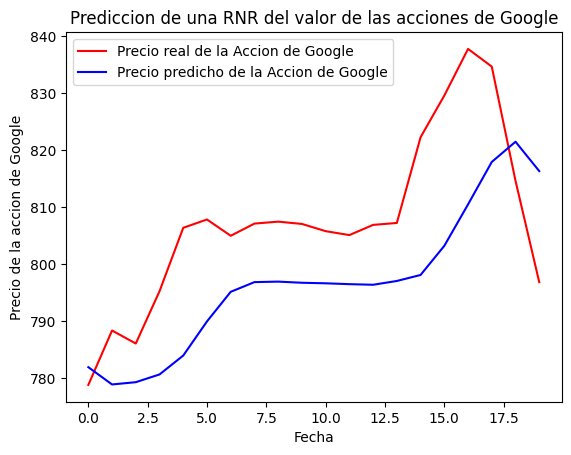

In [10]:
#Display the results
plt.plot(testing_set, color="red", label = "Actual Google Share Price")
plt.plot(predicted_stock_price, color="blue", label = "Predicted Google Share Price")
plt.title("Prediction of an RNR of the value of Google's shares")
plt.xlabel("Date")
plt.ylabel("Google share price")
plt.legend()
plt.show()

In [15]:
import math 
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(testing_set, predicted_stock_price))
print(rmse)
print(testing_set.mean())
print(rmse/800*100)

15.344750376271245
807.5260000000001
1.9180937970339054


# PART 4 - ADDING A GRID SEARCH 

In [ ]:
### PART 0 --- IMPORT LIBRARIES
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , TimeSeriesSplit

###PART 1 --- DATA PROCESSING
##TRAINING

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#Import training dataset
df = pd.read_csv("./Google_Stock_Price_Train.csv")
training_set = df.iloc[:,1:2 ].values 

#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
 
#Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(120, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)  

# Data resizing
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##TEST
#Import training dataset
df_t = pd.read_csv("./Google_Stock_Price_Test.csv")
testing_set = df_t.iloc[:,1:2 ].values 
#Predicting the January 2018 actions with the RNR
dataset_total = pd.concat((df["Open"], df_t["Open"]), axis=0 ) 
inputs = dataset_total[len(dataset_total) - len(df_t) - 120 :  ].values
inputs = inputs.reshape(-1,1) #leaves the first dimension and adds a second dimension
inputs = sc.transform(inputs)

X_test = []
for i in range(120,len(inputs)):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))



### CREATION OF THE MODEL

def build_regresor(optimizer= "adam", units=50, rate= 0.2):
    #Initialise the NN
    regressor= Sequential()
    #Input layer and first hidden layer
    regressor.add(LSTM(units = units, return_sequences = True, input_shape =(X_train.shape[1], 1) ))
    regressor.add(Dropout(rate = rate))
    
    #Second layer and hidden layer
    regressor.add(LSTM(units = units, return_sequences = True))
    regressor.add(Dropout(rate = rate))
    
    #Third layer and hidden layer
    regressor.add(LSTM(units = units, return_sequences = True ))
    regressor.add(Dropout(rate = rate))
    
    #Fourth layer and hidden layer
    regressor.add(LSTM(units = units, return_sequences = False ))
    regressor.add(Dropout(rate = rate))
     
    #Exit layer
    regressor.add(Dense(units = 1))
    #Compiling RNA
    regressor.compile(optimizer=optimizer, loss="mean_squared_error")
    
    #Return the classifier
    return  regressor


regressor = KerasRegressor(build_fn = build_regresor)


parameters = {
    "batch_size": [10, 25, 32, 64],
    "epochs": [100, 150, 200, 250],
    "model__optimizer": ["adam", "rmsprop", "sgd", "adagrad", "adadelta", "nadam"],
    "model__units": [50, 75, 100, 150],
    "model__rate": [0.1, 0.2, 0.3]
}

tscv = TimeSeriesSplit(n_splits= 10)

grid_search = RandomizedSearchCV (estimator = regressor,  
                            param_distributions = parameters,
                            scoring="neg_mean_squared_error",
                            cv = tscv,
                            n_iter=20)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_model = grid_search.best_estimator_

1/1 [==============================] - 0s 94ms/step


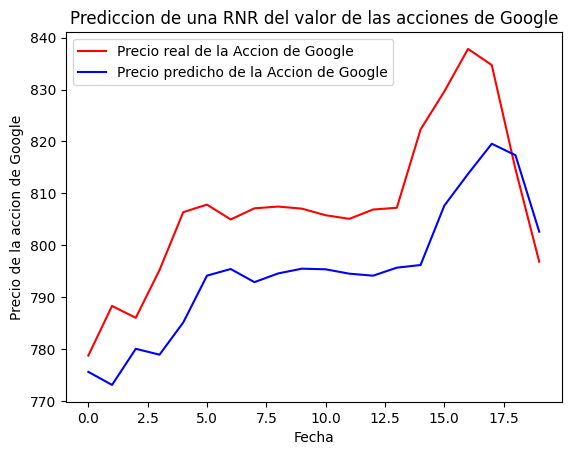

In [26]:
predicted_stock_price = best_model.predict(X_test)
predicted_stock_price = np.reshape(predicted_stock_price,(-1,1))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualizar los resultados
plt.plot(testing_set, color="red", label = "Actual Google Share Price")
plt.plot(predicted_stock_price, color="blue", label = "Predicted Google Share Price")
plt.title("Prediction of an RNR of the value of Google's shares")
plt.xlabel("Date")
plt.ylabel("Google share price")
plt.legend()
plt.show()

In [27]:
print(best_accuracy)
print(best_parameters)

-0.0006958246371055052
{'model__units': 100, 'model__rate': 0.2, 'model__optimizer': 'nadam', 'epochs': 200, 'batch_size': 25}
